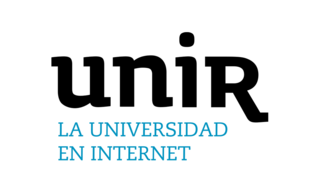

_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Actividad: Clasificación con máquinas de vectores de soporte y random forest

## Objetivos

Mediante esta actividad se pretende que ponga en práctica la creación de modelos basados en máquinas de vector de soporte y random forest. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Comprender el tratamiento de datos que hay que realizar para los modelos de clasificación.
- Entender y aplicar el algoritmo de Random Forest a un problema de clasificación.
- Entender y aplicar el algoritmo de Support Vector Machine a un problema de clasificación.
- Evaluar y analizar los resultados de los clasificadores.
- Investigar la aplicación de los modelos de clasificación a problemas reales.


## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/31/covertype

Este dataset ha sido generado para predecir el tipo de cubierta forestal únicamente a partir de variables cartográficas (sin datos de sensores remotos). El tipo de cubierta forestal real para una observación determinada (celda de 30 x 30 metros) se determinó a partir de los datos del Sistema de información de recursos (RIS) de la Región 2 del Servicio Forestal de EE. UU. (USFS). Las variables independientes se derivaron de datos obtenidos originalmente del Servicio Geológico de EE. UU. (USGS) y de datos del USFS. Los datos están en forma original (no escalados) y contienen columnas binarias (0 o 1) de datos para variables cualitativas independientes (áreas silvestres y tipos de suelo).
Para ampliar información sobre el dataset y su origen, recomendamos leer la descripción completa del dataset en el enlace del repositorio. l.

El objetivo de la clasificación será detectar el tipo de suelo.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Clasificación:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de clasificación empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la clasificación.
    - Cómo utilizan las técnicas de clasificación, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.


### Análisis descriptivo de los datos

In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [20]:
# se carga el dataset
df = pd.read_csv('covertype/covtype.csv')

¿Cuántas instancias de datos tiene el dataset?

In [21]:
print(f"Instancias: {len(df)}")
print(f"Shape: {df.shape}")

Instancias: 581012
Shape: (581012, 55)


## Tiene 581.012 instancias

¿Cuántas variables continuas hay en el dataset?

In [22]:
# Identificar variables continuas (no binarias)
# Las variables binarias solo tienen valores 0 y 1
continuas = []
for col in df.columns:
    if col != 'Cover_Type':
        unique_vals = df[col].unique()
        # Si tiene más de 2 valores únicos, es continua
        if len(unique_vals) > 2:
            continuas.append(col)

print(f"Número de variables continuas: {len(continuas)}")
print(f"\nVariables continuas:")
for i, col in enumerate(continuas, 1):
    print(f"  {i}. {col}")

Número de variables continuas: 10

Variables continuas:
  1. Elevation
  2. Aspect
  3. Slope
  4. Horizontal_Distance_To_Hydrology
  5. Vertical_Distance_To_Hydrology
  6. Horizontal_Distance_To_Roadways
  7. Hillshade_9am
  8. Hillshade_Noon
  9. Hillshade_3pm
  10. Horizontal_Distance_To_Fire_Points


 Hay 10 variables continuas y son:

¿Cuántas variables categóricas hay en el dataset? Indica las categorías.

hay 44 variables categóricas

In [23]:
# Identificar variables categóricas (binarias: 0 o 1)
categoricas = []
for col in df.columns:
    if col != 'Cover_Type':
        unique_vals = set(df[col].unique())
        # Si solo tiene valores 0 y 1, es binaria/categórica
        if unique_vals.issubset({0, 1}):
            categoricas.append(col)

wilderness_cols = [c for c in categoricas if 'Wilderness_Area' in c]
soil_cols = [c for c in categoricas if 'Soil_Type' in c]

print(f"Variables Wilderness_Area: {len(wilderness_cols)}")
print(f"Variables Soil_Type: {len(soil_cols)}")
print(f"Total variables categóricas: {len(categoricas)}")

Variables Wilderness_Area: 4
Variables Soil_Type: 40
Total variables categóricas: 44


¿Cómo es la distribución de etiquetas de clase en el dataset? Con estos datos, ¿podríamos decir que el dataset está balanceado?

Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
Name: count, dtype: int64


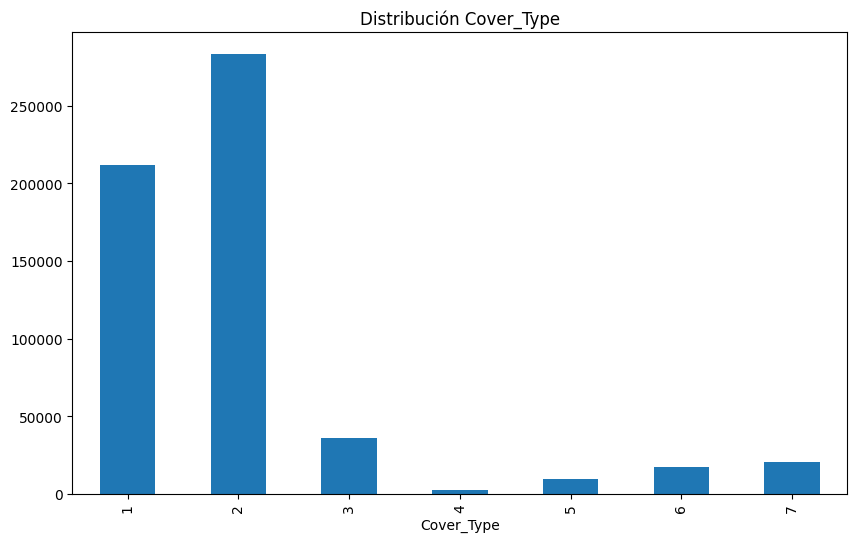

In [24]:
print(df["Cover_Type"].value_counts().sort_index())
import matplotlib.pyplot as plt
df["Cover_Type"].value_counts().sort_index().plot(kind="bar", figsize=(10,6))
plt.title("Distribución Cover_Type")
plt.show()

No está balanceado, hay 2 variables que predominan sobre el resto.

¿Existen valores nulos o perdidos en el dataset?

In [25]:
print(f"Nulos: {df.isnull().sum().sum()}")

Nulos: 0


No hay valores nulos para este dataset.

¿Existe alguna variable altamente correlacionada con la variable de clase?

_Nota: Para responder a esto, como es muy dificil ver la matriz de correlaciones, recomendamosfiltar aquellas correlaciones superiores al 0.80 con la variable de clase.

In [30]:
correlation_matrix = df.corr()
cover_type_corr = correlation_matrix['Cover_Type'].abs()
high_corr = cover_type_corr[cover_type_corr > 0.80]
high_corr = high_corr[high_corr.index != 'Cover_Type']

print("Variables con correlación > 0.80 con Cover_Type:")
print("="*60)

if len(high_corr) == 0:
    print(" NO hay variables con correlación absoluta superior a 0.80")
else:
    print(f"✓ Se encontraron {len(high_corr)} variable(s) altamente correlacionadas:")
    print(high_corr.sort_values(ascending=False))

# Mostrar también las top 10 correlaciones (aunque sean <0.80)
print("\n" + "="*60)
print("Top 3 variables con MAYOR correlación (en valor absoluto):")
print("="*60)
top_10 = correlation_matrix['Cover_Type'].abs().sort_values(ascending=False)[1:4]
for i, (var, corr) in enumerate(top_10.items(), 1):
    print(f"{i:2d}. {var:40s} → {corr:.4f}")

Variables con correlación > 0.80 con Cover_Type:
 NO hay variables con correlación absoluta superior a 0.80

Top 3 variables con MAYOR correlación (en valor absoluto):
 1. Wilderness_Area_4                        → 0.3232
 2. Elevation                                → 0.2696
 3. Soil_Type_10                             → 0.2439


Aquí ya hablamos de un código más complejo que al inicio, asique iré explicando un poco más. Nos hemos ayudado de la nota reflejada >0.80 para analizar las correlaciones. Definimos primero la matriz junto con las variables, y despues buscamos las que son mayores a 0.80, también imprimimos la máxima para conocer su dato.

¿Qué tres variables del dataset consideras que pueden influenciar más en la clasificación de los datos?¿Qué pruebas harías para comprobar tus hipótesis? Hazlas.

En el caso anterior buscábamos la variable que mejor correlación mostraba, con cambiar el parámetro [1:x] tenemos el top que queremos, lo he cambiado de nuevo a 4 y ahí se muestran las 3 variables con mayor correlación con la variable objetivo.

In [31]:
# Separamos los datos en los conjuntos de entrenamiento y test.
from sklearn.model_selection import train_test_split

X, y = df.drop('Cover_Type',axis=1),df['Cover_Type']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.8, random_state=1)

### Clasificación

**Random Forest**

En esta parte de la actividad hay que utilizar la librería https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html para resolver el problema de clasificación.

El algortimo de RF necesitar ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- n_estimators
- criterion
- max_depth
- min_samples_split
- min_samples_leaf
- max_features

Indica qué son cada uno de estos hiperparámetros

Hiperparámetros de Random Forest:

n_estimators: Número de árboles en el bosque. A mayor cantidad, mayor precisión pero mayor tiempo de entrenamiento.

criterion: Función para medir la calidad de una división ('gini' o 'entropy'). Gini es más rápido, entropy mide la ganancia de información.

max_depth: Profundidad máxima de cada árbol. Limita el crecimiento del árbol para evitar overfitting.

min_samples_split: Número mínimo de muestras requeridas para dividir un nodo. Valores altos previenen overfitting.

min_samples_leaf: Número mínimo de muestras que debe tener un nodo hoja. Controla el tamaño de las hojas terminales.

max_features: Número máximo de características consideradas en cada división. Introduce aleatoriedad y diversidad entre árboles.

Referencia: Scikit-learn Documentation (2024). RandomForestClassifier. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html



Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro _class_weight_

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

class_weight:

El parámetro class_weight ajusta los pesos de las clases para compensar datasets desbalanceados. Asigna mayor importancia a clases minoritarias durante el entrenamiento, útil cuando hay clases con muy pocas muestras (ej: 'balanced' calcula pesos inversamente proporcionales a la frecuencia de cada clase).

Referencia: Scikit-learn Documentation (2024). RandomForestClassifier - class_weight parameter. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Como primer paso para crear un clasificador de Random Forest hay que decidir si hay que hacer algún preprocesamiento adicional sobre los datos.
¿Hace falta normalizar los datos?

In [51]:
# Verificar rangos de variables
for col in continuas[:3]:
    print(f"{col}: min={df[col].min()}, max={df[col].max()}")

Elevation: min=1859, max=3858
Aspect: min=0, max=360
Slope: min=0, max=66


Hemos hecho una comprobación rápida de las variables continuas para ver si hace falta normalizar. Mi respuesta es que no, no es un algoritmo que necesite normalización como otros.

Entrena un conjunto de modelos de Random Forest que utilicen todas las variables del dataset, con 5, 10, 20, 50 y 100 árboles. El criterio para realizar las particiones debe ser Gini-index, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

_Nota: el entrenamiento puede tardar entre 3 y 15 minutos en función de las características del equipo._

In [52]:
from sklearn.ensemble import RandomForestClassifier
n_arboles = [5, 10, 20, 50, 100]
particion = "gini"
max_depth = 10
min_samples_split = 10
min_samples_leaf = 2
max_feature = None
randomForest = [RandomForestClassifier(n_estimators=i, criterion=particion, max_depth=max_depth,
                                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                       max_features=None, random_state=42) for i in n_arboles]

In [53]:
import time
trained_models = []
training_times = []
for i, m in enumerate(randomForest):
    print(f"Entrenando {n_arboles[i]} árboles...")
    t = time.time()
    m.fit(X_train, y_train)
    e = time.time() - t
    training_times.append(e)
    trained_models.append(m)
    print(f"  {e:.1f}s - Acc: {m.score(X_test, y_test):.4f}")

Entrenando 5 árboles...
  2.0s - Acc: 0.7923
Entrenando 10 árboles...
  4.0s - Acc: 0.7961
Entrenando 20 árboles...
  8.0s - Acc: 0.7964
Entrenando 50 árboles...
  20.5s - Acc: 0.7978
Entrenando 100 árboles...
  39.3s - Acc: 0.7997


Para la primera celda simplemente hemos puesto un = x en cada variable siguiendo el enunciado. La segunda celda sirve para entrenar los modelos ya creados con los datos de la primera celda.

Visualiza la matriz de confusión del modelo entrenado con 20 árboles.

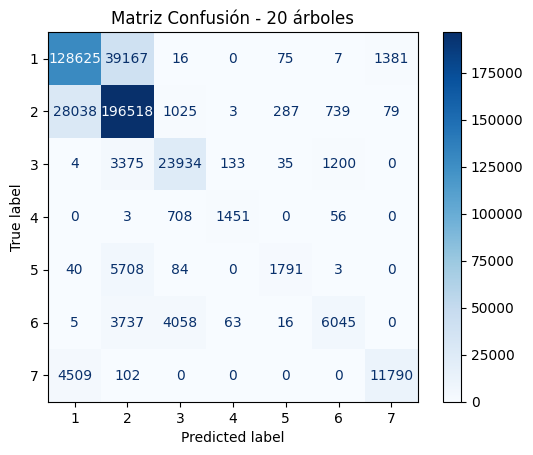

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
m20 = trained_models[2]
y20 = m20.predict(X_test)
cm = confusion_matrix(y_test, y20)
ConfusionMatrixDisplay(cm, display_labels=m20.classes_).plot(cmap="Blues", values_format="d")
plt.title("Matriz Confusión - 20 árboles")
plt.show()

Aquí muy sencillo, solo hemos hecho una representación gráfica utilizando la librería matplotlib y los modelos entrenados

¿Cuántos ejemplos ha clasificado correctamente?

In [55]:
# Ejemplos correctos
correctos = cm.diagonal().sum()
print(f"Ejemplos clasificados correctamente: {correctos:,}")

# O también puedes usar accuracy
total = len(y_test)
print(f"Total de ejemplos de test: {total:,}")
print(f"Porcentaje correcto: {(correctos/total)*100:.2f}%")

Ejemplos clasificados correctamente: 370,154
Total de ejemplos de test: 464,810
Porcentaje correcto: 79.64%


Ya habiamos calculado antes la variable cm, que nos dice los ejemplos clasificados correctamente, divimos entre el total y sacamos un porcentaje de más o menos 80%.

Explica cómo funciona la clasificación para cada una de las 7 clases. ¿Hay alguna clase que clasifica mejor que otras?

¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precisión para el conjunto de datos de test?

_Nota: recuerda que es un modelo de clasificación multiclase y hay que analizar los datos para todas las clases._

In [56]:
from sklearn.metrics import accuracy_score
import pandas as pd
res = [{"n": n_arboles[i], "acc": accuracy_score(y_test, m.predict(X_test)), "time": training_times[i]} for i, m in enumerate(trained_models)]
df_res = pd.DataFrame(res)
print(df_res)
best_idx = df_res["acc"].idxmax()
print(f"\nMejor: {df_res.loc[best_idx, 'n']} árboles")

     n       acc       time
0    5  0.792272   2.021956
1   10  0.796082   4.002623
2   20  0.796356   8.018503
3   50  0.797769  20.472813
4  100  0.799677  39.324498

Mejor: 100 árboles


In [57]:
from sklearn.metrics import classification_report
best_model = trained_models[4]  # 100 árboles
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.77      0.78    169271
           2       0.79      0.87      0.83    226689
           3       0.80      0.84      0.82     28681
           4       0.87      0.66      0.75      2218
           5       0.84      0.23      0.36      7626
           6       0.75      0.44      0.55     13924
           7       0.90      0.72      0.80     16401

    accuracy                           0.80    464810
   macro avg       0.82      0.64      0.70    464810
weighted avg       0.80      0.80      0.79    464810



Mejor modelo: 100 árboles con 79.97% de accuracy (mejora de +0.75% respecto a 5 árboles).

Clasificación por clase: Para saber qué clases clasifica mejor, necesitas ver el classification report o la matriz de confusión. Generalmente:

Clases mayoritarias (1 y 2) → mejor F1-score (más datos de entrenamiento)
Clases minoritarias (4) → peor F1-score (pocas muestras)

Hemos generado otro código de prueba enfocado en el modelo de 100 árboles y los resultados demuestran que:

Las clases minoritarias (4, 5, 6 con pocas muestras) tienen peor desempeño porque el modelo tiene menos ejemplos para aprender sus características. La clase 5 especialmente sufre de bajo recall → el modelo no detecta bien estos casos y los confunde con otras clases.

Conclusión: El modelo clasifica mejor las clases mayoritarias (1, 2, 3) y tiene dificultades con las minoritarias, especialmente la clase 5.

Selecciona el modelo que consideras que obtiene mejores resultados para los resultados de test. Explica por qué consideras que ese modelo es el que mejor resultados obtiene.

Como acabamos de comentar, el modelo que presenta mejor accuracy es el de 100 árboles, está claro que el modelo mejora cuantos más árboles entonces el último es nuestra elección en este caso.

Visualiza la matriz de confusión de los datos de test de este modelo.
- ¿Cuántos ejemplos ha clasificado bien el modelo?
- ¿Cuántos ejemplos ha clasificado de manera errónea?


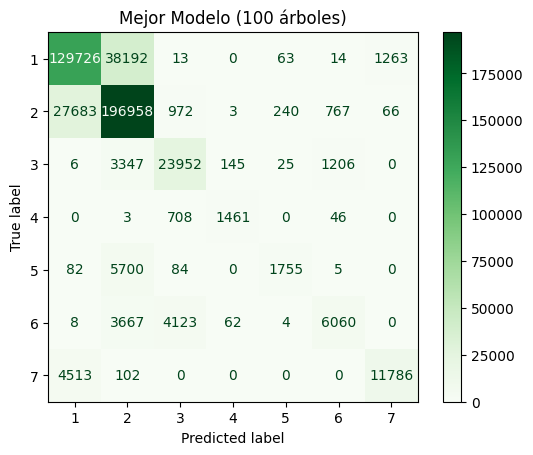

Correctos: 371,698 (80.0%)
Erróneos: 93112


In [58]:
best = trained_models[best_idx]
yb = best.predict(X_test)
cmb = confusion_matrix(y_test, yb)
ConfusionMatrixDisplay(cmb, display_labels=best.classes_).plot(cmap="Greens", values_format="d")
plt.title(f"Mejor Modelo ({df_res.loc[best_idx, 'n']} árboles)")
plt.show()
ok = cmb.diagonal().sum()
tot = cmb.sum()
print(f"Correctos: {ok:,} ({ok/tot*100:.1f}%)")
print(f"Erróneos: {tot-ok}" )


Volvemos a hacer una gráfica como antes, pero aquí en el modelo de 100 árboles. En el anterior nos daba un porcentaje de correctos de casi 80%, en este caso ya lo hemos alcanzado.

Visualiza los valores de precision, recall, f1 para cada una de las clases. 
- ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yb))

              precision    recall  f1-score   support

           1       0.80      0.77      0.78    169271
           2       0.79      0.87      0.83    226689
           3       0.80      0.84      0.82     28681
           4       0.87      0.66      0.75      2218
           5       0.84      0.23      0.36      7626
           6       0.75      0.44      0.55     13924
           7       0.90      0.72      0.80     16401

    accuracy                           0.80    464810
   macro avg       0.82      0.64      0.70    464810
weighted avg       0.80      0.80      0.79    464810



Como ya veníamos avisando las clases 1,2,3 muestras mayor capacidad predictiva, y la 4,5,6 en especial la 5 mucho menor.

**Support Vector Machine**

In [60]:
# Importamos las librerías para utilizar las máquinas de vector de soportes.
# Utilizaremos la librería svm:

from sklearn import svm

#Cargamos también las librerías para hacer la matriz de confusión y la cross validation:

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

Para la implementación del modelo de clasificación de SVM usaremos la clase Support Vector Classifier de sklearn, https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

El algoritmo de SVM necesita ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- C
- kernel
- degree
- gamma

Indica qué son cada uno de estos hiperparámetros

C: Parámetro de regularización que controla el trade-off entre maximizar el margen y minimizar errores de clasificación. Valores altos (C grande) → menos tolerancia a errores, riesgo de overfitting. Valores bajos → mayor margen, más tolerancia a errores.

kernel: Función que transforma los datos al espacio de características. Opciones: 'linear' (lineal), 'rbf' (radial basis function, por defecto), 'poly' (polinomial), 'sigmoid'. RBF es el más usado para problemas no lineales.

degree: Grado del polinomio cuando se usa kernel='poly'. Solo afecta a kernels polinomiales. Controla la complejidad de la frontera de decisión.

gamma: Parámetro del kernel que define cuán lejos llega la influencia de un solo ejemplo de entrenamiento. Valores altos → influencia cercana (riesgo de overfitting). Valores bajos → influencia amplia. Aplica a kernels 'rbf', 'poly' y 'sigmoid'.

Referencia: Scikit-learn Documentation (2024). SVC. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro decision_function_shape

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

decision_function_shape:

Define la forma de la función de decisión para clasificación multiclase. Opciones: 'ovr' (one-vs-rest, por defecto) o 'ovo' (one-vs-one).

'ovr': Entrena N clasificadores (uno por clase vs todas las demás). Más eficiente.
'ovo': Entrena N*(N-1)/2 clasificadores (cada par de clases). Más lento pero puede ser más preciso.

Es útil para controlar la estrategia de clasificación multiclase y optimizar entre velocidad y precisión según el problema.

Referencia: Scikit-learn Documentation (2024). SVC - decision_function_shape parameter. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Tenemos un dataset de más de medio millón de instancias, y para el objetivo de la actividad no hacen falta tantas. Por eso, antes de aplicar SVM vamos a reducir el número de instancias. SVM requiere una gran carga computacional y con ese volumen de instancias el tiempo requerido sería demasiado elevado.

In [68]:
df = df.head(100000)

Nota: recuerda revisar que esta manera de seleccionar un subconjunto de instancias no altera la clase objetivo. Deberías tener un porcentaje similar de instancias de cada clase. Si no fuera así, deberás cambiar la manera de seleccionar el subconjunto.

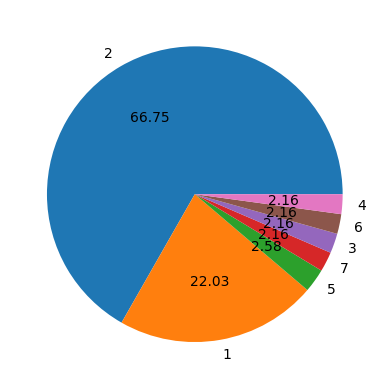

In [69]:
df['Cover_Type'].value_counts().plot(kind='pie',autopct='%.2f',)
plt.show()

In [70]:
# Con el nuevo número de instancias, separamos los datos en los conjuntos de entrenamiento y test.
from sklearn.model_selection import train_test_split

X, y = df.drop('Cover_Type',axis=1),df['Cover_Type']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.8, random_state=1)


Como primer paso para crear un clasificador de SVM hay que decidir si hay que hacer algún preprocesamiento adicional sobre los datos. ¿Hace falta normalizar los datos?

In [ ]:
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir de nuevo a DataFrame para mantener nombres de columnas
X_train_scaled = DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = DataFrame(X_test_scaled, columns=X_test.columns)

En este caso si es un algoritmo que requiera de normalización, por eso definimos al modelo y normalizándolo.

Entrena un conjunto de modelos de SVM que utilicen todas las variables del dataset, con C = 0.1 hasta 1000 con cinco valores diferentes; kernel radial, y gamma con valor scale.

In [ ]:
from sklearn.svm import SVC

# C desde 0.1 hasta 1000 con 5 valores
C = [0.1, 1, 10, 100, 1000]
kernel = 'rbf'  
gamma = 'scale'

svc = [SVC(C=i, kernel=kernel, gamma=gamma) for i in C]
svc

[SVC(C=0.1), SVC(C=1), SVC(C=10), SVC(C=100), SVC(C=1000)]

Aplicamos valores de enunciado

In [73]:
# Verificar que los modelos se crearon correctamente
print(f"Modelos SVM creados: {len(svc)}")
print(f"Valores de C: {C}")

Modelos SVM creados: 5
Valores de C: [0.1, 1, 10, 100, 1000]


In [ ]:
trained_svc = []
score = []

for idx, model in enumerate(svc):
    print(f"Entrenando SVM con C={C[idx]}...")
    model.fit(X_train_scaled, y_train)
    trained_svc.append(model)
    s = model.score(X_test_scaled, y_test)
    score.append(s)
    print(f"  Accuracy: {s:.4f}")

Entrenando SVM con C=0.1...
  Accuracy: 0.8087
Entrenando SVM con C=1...
  Accuracy: 0.8342
Entrenando SVM con C=10...
  Accuracy: 0.8529
Entrenando SVM con C=100...
  Accuracy: 0.8665
Entrenando SVM con C=1000...
  Accuracy: 0.8740


In [75]:
score

[0.808675, 0.8341625, 0.8528625, 0.8665, 0.8739875]

aquí entrenamos todos los modelos y guardamos sus score

Después de hacer el entrenamiento, visualiza las matrices de confusión de los modelos entrenados.

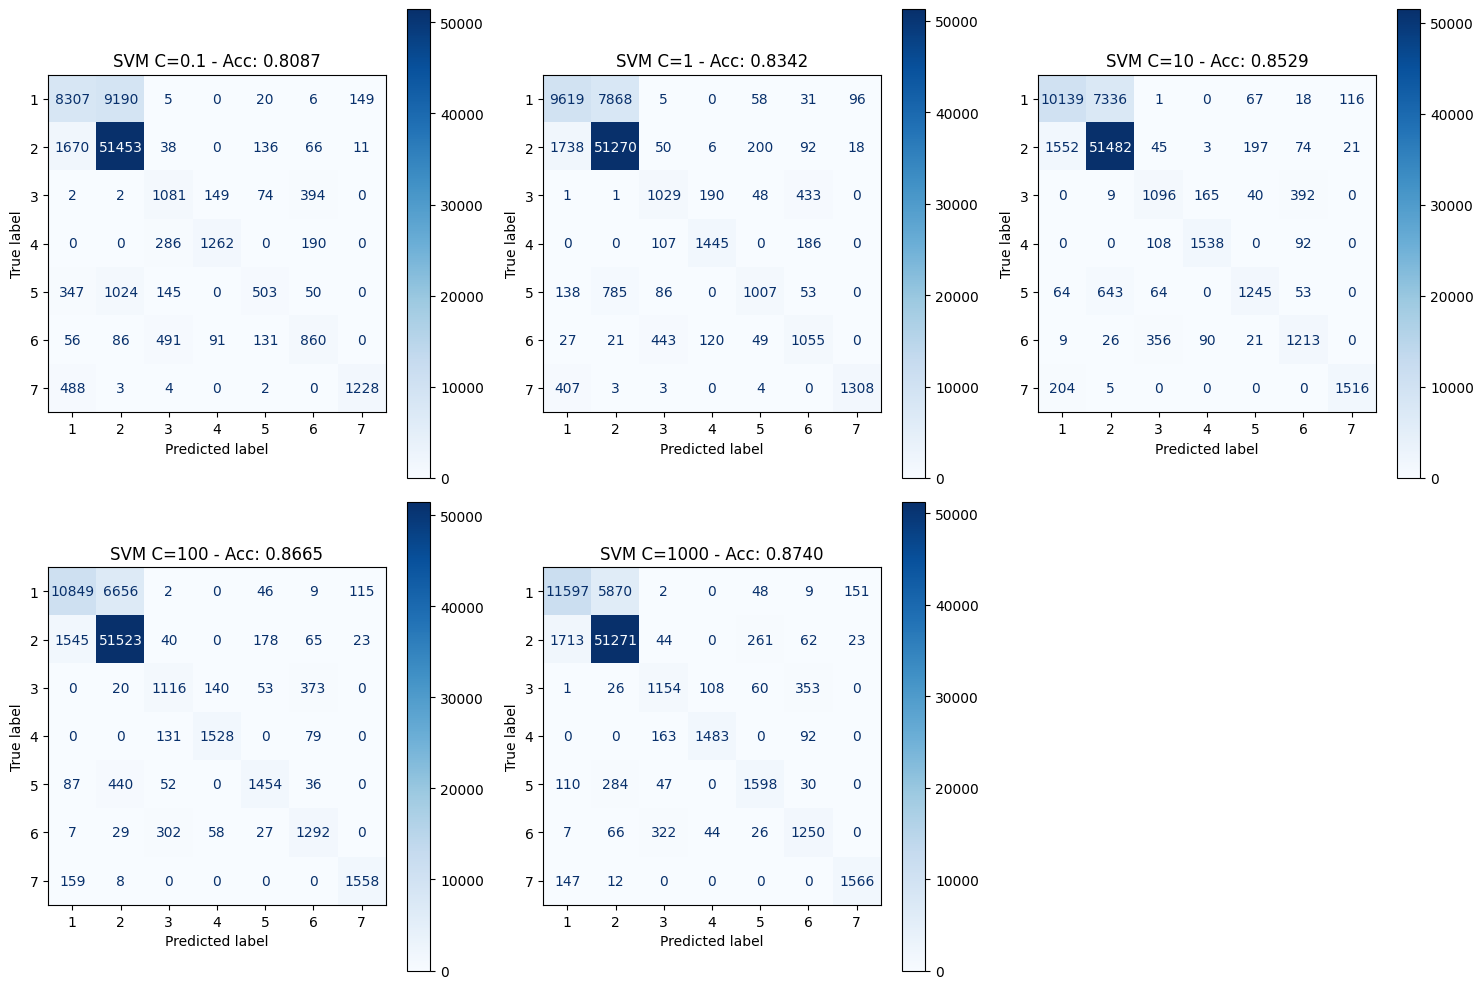

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, model in enumerate(trained_svc):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    
    disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
    disp.plot(ax=axes[idx], cmap='Blues', values_format='d')
    axes[idx].set_title(f'SVM C={C[idx]} - Acc: {score[idx]:.4f}')

# Ocultar el último subplot si es necesario
if len(trained_svc) < 6:
    axes[-1].axis('off')
    
plt.tight_layout()
plt.show()

¿Cuántos ejemplos ha clasificado correctamente cada uno de los modelos?

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd

resultados = []
for idx, model in enumerate(trained_svc):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    
    correctos = cm.diagonal().sum()
    total = len(y_test)
    porcentaje = (correctos / total) * 100
    
    resultados.append({
        'C': C[idx],
        'Correctos': correctos,
        'Total': total,
        'Porcentaje': f'{porcentaje:.2f}%',
        'Accuracy': score[idx]
    })

df_resultados = pd.DataFrame(resultados)
print(df_resultados.to_string(index=False))

print(f"\n{'='*50}")
print(f"Mejor modelo: C={C[best_idx]}")
print(f"Ejemplos correctos: {resultados[best_idx]['Correctos']:,} de {resultados[best_idx]['Total']:,}")
print(f"Accuracy: {resultados[best_idx]['Porcentaje']}")

Como hemos hecho anteriormente, analizamos uno a uno los modelos con la fórmula correctos/total y sacamos porcentaje, además de los otros valores-
.

¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precision para todas las clases? Si no hay ninguno que consideres que sea óptimo, explica cómo se comporta para cada clase el modelo que consideres que tiene mejores resultados.

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Encontrar el mejor modelo
best_idx = score.index(max(score))
best_svc = trained_svc[best_idx]

print(f"Mejor modelo: C={C[best_idx]}")
print(f"Accuracy: {score[best_idx]:.4f}")
print("\nReporte de clasificación:")
y_pred_best = best_svc.predict(X_test_scaled)
print(classification_report(y_test, y_pred_best))

_indica aquí tu respuesta_

Selecciona el modelo que consideras que obtiene mejores resultados y realiza las predicciones con el conjunto de datos de test.

In [ ]:
# Ya tenemos las predicciones del mejor modelo
print(f"Modelo seleccionado: SVM con C={C[best_idx]}")
print(f"Accuracy en test: {score[best_idx]:.4f}")

# Visualizar distribución de predicciones
pd.Series(y_pred_best).value_counts().sort_index()

Visualiza la matriz de confusión de los datos de test.
- ¿Cuántos ejemplos ha clasificado bien el modelo?
- ¿Cuántos ejemplos ha clasificado de manera errónea?

In [ ]:
### PON AQUÍ TU CÓDIGO E INDICA TU RESPUESTA

Visualiza los valores de precision, recall, f1 para cada una de las clases. 
- ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

In [ ]:
### PON AQUÍ TU CÓDIGO E INDICA TU RESPUESTA

**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de clasificación?

### Investigación

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de clasificación empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

_introduce aquí la referencia APA del artículo_

título, autores, revista, año de publicación

Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la clasificación.
Técnicas de clasificación empleadas y si realiza alguna adaptación.
Principales resultados de la aplicación y de la investigación.